In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

Importar o arquivo da Primeira Temporada

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving got-s1-edges.csv to got-s1-edges.csv
User uploaded file "got-s1-edges.csv" with length 9976 bytes


Ler arquivo e criar um Grafo

In [ ]:
fh = open("/content/got-s1-edges.csv")
G = nx.read_weighted_edgelist(fh,delimiter="," ,  create_using=nx.Graph)
fh.close()

# *Métricas de Grafo*


Tamanho do Grafo

In [ ]:
print(f"Quantidade de Nós: {nx.number_of_nodes(G)}")
print(f"Quantidade de Arestas: {nx.number_of_edges(G)}")

Quantidade de Nós: 126
Quantidade de Arestas: 549


Características Principais

In [ ]:
print(f"{'Grafo Direcionado' if nx.is_directed(G) else 'Grafo Não Direcionado'}")

Grafo Não Direcionado


In [ ]:
print(f"{'Grafo Conexo' if nx.is_connected(G) else 'Grafo Desconexo'}")

Grafo Conexo


In [ ]:
print("Densidade: "+"{:.4f}".format(nx.density(G)))

Densidade: 0.0697


In [ ]:
print(f"Diâmetro: {nx.diameter(G)}")

Diâmetro: 6


In [ ]:
print(f"Grau Médio: {int(sum(g for n, g in G.degree()) / nx.number_of_nodes(G))}")

Grau Médio: 8


In [ ]:
peso = 0

for no1, no2, dados in G.edges(data=True):
    if "weight" in dados:
        peso += dados["weight"]

print("Soma dos pesos das arestas:", peso)


Soma dos pesos das arestas: 6528.0


In [ ]:
from networkx.algorithms.community import louvain_communities

# Executar o algoritmo de Girvan-Newman para encontrar as comunidades

comunidades = louvain_communities(G, seed=None)

# Imprima as comunidades
for i, c in enumerate(comunidades, 1):
  qtd = len(c)
  lista = []
  for no in G:
    if no in c:
      central = no
      break
  print(f"Comunidade {i}: Tamanho: {qtd} personagens Personagem Central: {central}\n{c}")
  print('\n')

Comunidade 1: Tamanho: 17 personagens Personagem Central: DAENERYS
{'JHIQUI', 'VISERYS', 'DAENERYS', 'DOREAH', 'MIRRI_MAZ_DUUR', 'QOTHO', 'IROGENIA', 'DROGO', 'IRRI', 'RHAEGO', 'WINE_MERCHANT', 'ILLYRIO', 'RAKHARO', 'COHOLLO', 'LITTLE_BIRD', 'MAGO', 'JORAH'}


Comunidade 2: Tamanho: 18 personagens Personagem Central: JON
{'DAREON', 'BENJEN', 'PYP', 'ALLISER_THORNE', 'LUKE', 'BOWEN_MARSH', 'OTHELL_YARWYCK', 'JAREMY_RYKKER', 'JEOR', 'MELESSA', 'OTHOR', 'SAM', 'JON', 'RAST', 'RANDYLL', 'BORCAS', 'MAESTER_AEMON', 'GRENN'}


Comunidade 3: Tamanho: 23 personagens Personagem Central: CATELYN
{'OSHA', 'HODOR', 'MAESTER_LUWIN', 'RYGER_RIVERS', 'RODRIK', 'RICKARD_KARSTARK', 'JONOS_BRACKEN', 'ROBB', 'GALBART_GLOVER', 'CATELYN', 'STEVRON_FREY', 'GREATJON_UMBER', 'WALDER', 'THEON', 'JOYEUSE', 'OLD_NAN', 'RICKON', 'HOSTER', 'ASSASSIN', 'BRAN', 'BALON', 'BRANDON_STARK', 'ROS'}


Comunidade 4: Tamanho: 16 personagens Personagem Central: BRONN
{'MASHA_HEDDLE', 'SHAGGA', 'TYRION', 'TYSHA', 'TYWIN', 'MOR

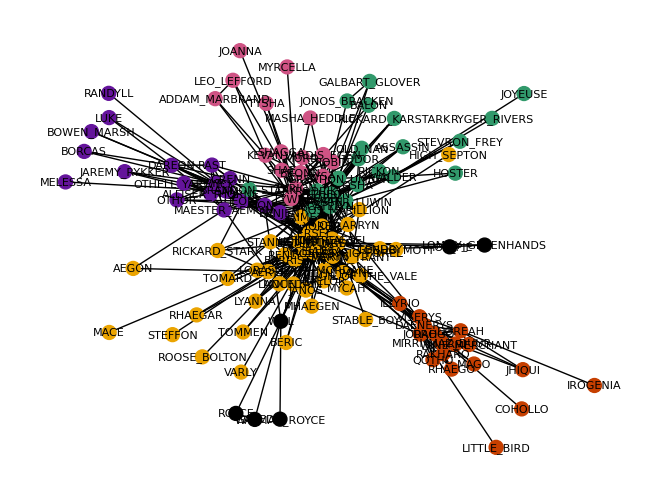

<Figure size 10000x20000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

cores = []

for node in G.nodes:
  if node in comunidades[0]:
    cores.append('#C63F00') # daenerys
  elif node in comunidades[1]:
    cores.append('#64149B') # jon snow
  elif node in comunidades[2]:
    cores.append('#31996B') # robb e catelyn
  elif node in comunidades[3]:
    cores.append('#CF5384') # tyrion
  elif node in comunidades[4]:
    cores.append('#EBA400') # porto real
  elif node in comunidades[5]:
    cores.append('#000000') # torta quente?
  elif node in comunidades[6]:
    cores.append('#000000') # personagens da introdução

graus = dict(G.degree)
tamanhos = [int(graus[no]) * 50 for no in G.nodes]
visibilidade = [ int(graus[no]) > 60 for no in G.nodes]

# nx.draw(G, pos, node_color=cores, cmap=plt.get_cmap('viridis'), with_labels=True)
nx.draw_spring(G, with_labels=True, node_color=cores, font_size = 8, node_size = 100 , width = 1)

# Exiba o gráfico
plt.figure(figsize=(100, 200))
plt.show()


# *Métricas de Vértice*


[['NED', 57], ['TYRION', 41], ['ROBERT', 36], ['CATELYN', 36], ['ROBB', 30], ['CERSEI', 29], ['ARYA', 28], ['JOFFREY', 27], ['JON', 26], ['LITTLEFINGER', 26], ['SANSA', 26], ['JAIME', 24], ['VARYS', 21], ['BRAN', 20], ['THEON', 19]]


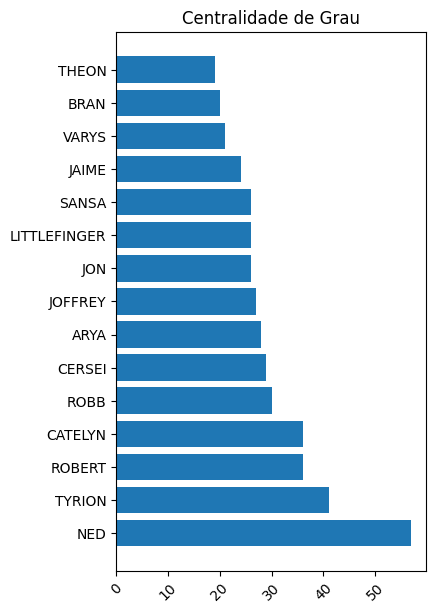

In [ ]:
centralidade_grau = []
for no in G:
  centralidade_grau.append([no, G.degree[no]])

centralidade_grau.sort(key=lambda x: x[1], reverse=True)
centralidade_grau = centralidade_grau[0:15]
print(centralidade_grau)

personagens = [item[0] for item in centralidade_grau]
graus = [item[1] for item in centralidade_grau]

plt.figure(figsize=(4,7))

plt.barh(personagens, graus)
plt.title('Centralidade de Grau')
plt.xticks(rotation=45)
plt.show()

[['NED', 3], ['ROBERT', 3], ['CATELYN', 3], ['AERYS', 3], ['DAENERYS', 4], ['JORAH', 4], ['JON', 4], ['LITTLEFINGER', 4], ['VARYS', 4], ['DROGO', 4], ['ARYA', 4], ['ROBB', 4], ['BRONN', 4], ['TYRION', 4], ['CERSEI', 4]]


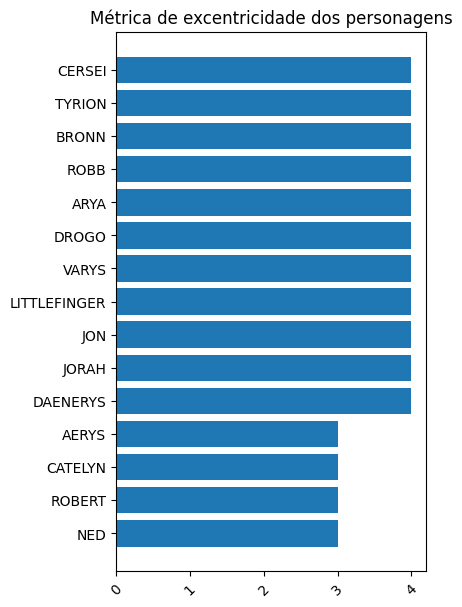

In [6]:
#excentricidade dos vértices

from threading import excepthook
#distancia máxima dele para qualquer outro nó, qnt maior + isolado/menos conectado?

lista_excentricidades = []
for n in G:
  lista_excentricidades.append([n, nx.eccentricity(G, v = n)])

lista_excentricidades.sort(key=lambda x: x[1])
lista_menor_exc = lista_excentricidades[0:15]

print(lista_menor_exc)
personagens = [item[0] for item in lista_menor_exc]
excentricidade = [item[1] for item in lista_menor_exc]

plt.figure(figsize=(4,7))  # Largura x Altura
plt.barh(personagens, excentricidade)
plt.title('Métrica de excentricidade dos personagens')
plt.xticks(rotation=45)
plt.show()

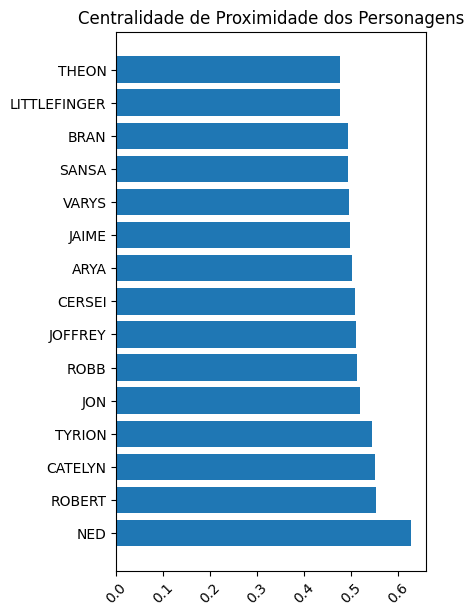

In [ ]:
#proximidade

lista_proximidade = []
proximidades = nx.closeness_centrality(G)

for no, prox in proximidades.items():
    lista_proximidade.append([no, prox])

lista_proximidade.sort(key=lambda x: x[1], reverse=True)
lista_proximidade = lista_proximidade[0:15]

personagens = [item[0] for item in lista_proximidade]
proximidades = [item[1] for item in lista_proximidade]

plt.figure(figsize=(4,7))
plt.barh(personagens, proximidades)
plt.title('Centralidade de Proximidade dos Personagens')
plt.xticks(rotation=45)
plt.show()

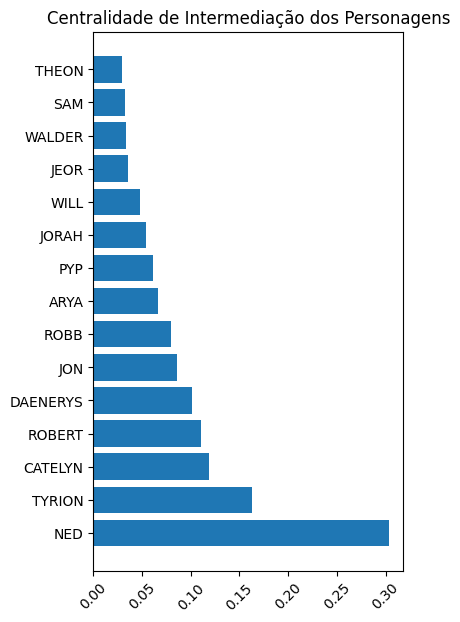

In [ ]:
#intermed

intermediacoes = nx.betweenness_centrality(G)
lista_intermediacoes = []

for no, inter in intermediacoes.items():
    lista_intermediacoes.append([no, inter])

lista_intermediacoes.sort(key=lambda x: x[1], reverse=True)
lista_intermediacoes = lista_intermediacoes[0:15]

personagens = [item[0] for item in lista_intermediacoes]
intermediacoes = [item[1] for item in lista_intermediacoes]

plt.figure(figsize=(4,7))  # Largura x Altura
plt.barh(personagens, intermediacoes)
plt.title('Centralidade de Intermediação dos Personagens')
plt.xticks(rotation=45)
plt.show()

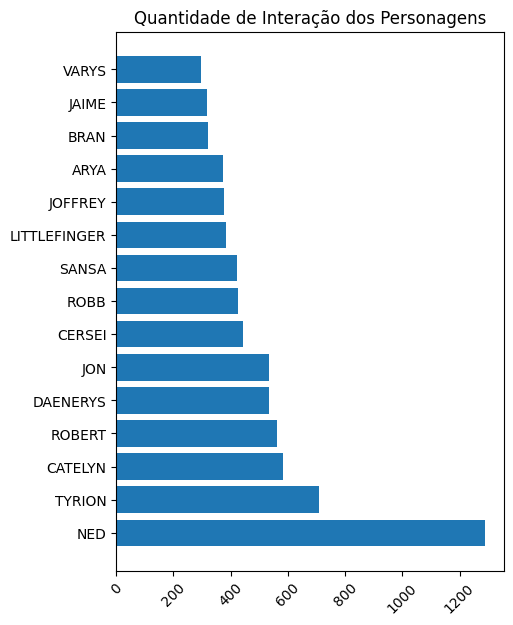

In [ ]:
lista_pesos = []

for no in G.nodes():
  peso = sum([G[no][vizinho]['weight'] for vizinho in G.neighbors(no)])
  lista_pesos.append([no, peso])

lista_pesos.sort(key=lambda x: x[1], reverse=True)
lista_pesos = lista_pesos[0:15]

personagem = [item[0] for item in lista_pesos]
interacoes = [item[1] for item in lista_pesos]

plt.figure(figsize=(5,7))
plt.barh(personagem, interacoes)
plt.title('Quantidade de Interação dos Personagens')
plt.xticks(rotation=45)
plt.show()